In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Load dataset

In [2]:
sc = MinMaxScaler(feature_range = (0, 1))

dataset = pd.read_csv("../data/database.txt")

### Correlation matrix

In [3]:
count = dataset.shape[0]

#### Correlation matrix of groups by different sensors

In [4]:
group_correlation = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        for k in range(count):
            group_correlation[i,j] += np.corrcoef(dataset.iloc[k][i:i+90],dataset.iloc[k][j:j+90])[0][1]
        group_correlation[i,j] = group_correlation[i,j]/count

In [6]:
group_correlation

array([[1.        , 0.88169479, 0.74543395, 0.60978034, 0.48054403,
        0.46504783, 0.45364534, 0.44099291],
       [0.88169479, 1.        , 0.88163396, 0.74679539, 0.61149489,
        0.48277072, 0.46799323, 0.4571562 ],
       [0.74543395, 0.88163396, 1.        , 0.88202053, 0.74772361,
        0.61293768, 0.48484451, 0.47034893],
       [0.60978034, 0.74679539, 0.88202053, 1.        , 0.88248985,
        0.74869313, 0.61446686, 0.48675955],
       [0.48054403, 0.61149489, 0.74772361, 0.88248985, 1.        ,
        0.88297559, 0.74972743, 0.61608682],
       [0.46504783, 0.48277072, 0.61293768, 0.74869313, 0.88297559,
        1.        , 0.88348004, 0.75077835],
       [0.45364534, 0.46799323, 0.48484451, 0.61446686, 0.74972743,
        0.88348004, 1.        , 0.88397019],
       [0.44099291, 0.4571562 , 0.47034893, 0.48675955, 0.61608682,
        0.75077835, 0.88397019, 1.        ]])

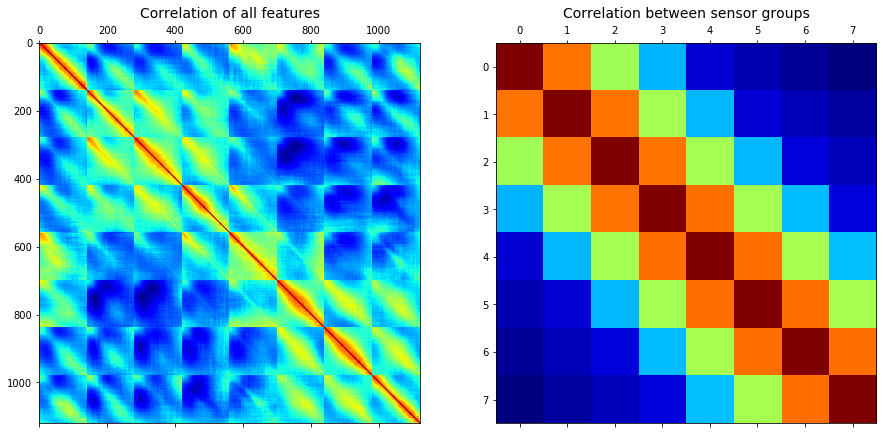

In [5]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
axes[0].matshow(dataset.corr(), cmap='jet')
axes[0].set_title("Correlation of all features",fontsize = 14)
axes[1].matshow(group_correlation, cmap='jet')
axes[1].set_title("Correlation between sensor groups",fontsize = 14)
plt.show()



### Distribution

In [7]:
dist = [[],[],[],[],[],[],[],[]]
for i in (range(8)):
    a = []
    for k in range(count):
        
        a = np.concatenate((a,np.array(dataset.iloc[k][i:i+100].values)),axis=None)
    dist[i] = a



Text(0.5, 0, 'Signal value of EMG 8, [Normalized units]')

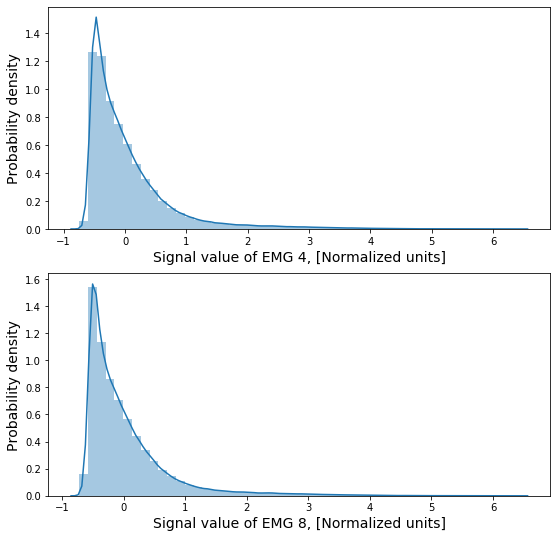

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(9,9))
plt.subplot(2,1,1)
sns.distplot(dist[3]);
#plt.title("Values distribution of EMG 4")
plt.ylabel("Probability density",fontsize = 14)
plt.xlabel("Signal value of EMG 4, [Normalized units]",fontsize = 14)
plt.subplot(2,1,2)
sns.distplot(dist[7]);
#plt.title("Values distribution of EMG 8")
plt.ylabel("Probability density",fontsize = 14)
plt.xlabel("Signal value of EMG 8, [Normalized units]",fontsize = 14)


### Shuffle

In [9]:
dataset_train = dataset.iloc[np.random.permutation(len(dataset))]
dataset_train.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120
0,-0.591369,-0.581760,-0.572151,-0.552933,-0.562542,-0.562542,-0.543324,-0.524106,-0.533715,-0.447233,...,-0.524106,-0.533715,-0.572151,-0.581760,-0.600978,-0.600978,-0.591369,-0.572151,-0.572151,1
1,-0.566305,-0.535327,-0.504350,-0.504350,-0.488861,-0.504350,-0.488861,-0.457884,-0.504350,-0.519838,...,-0.504350,-0.488861,-0.473373,-0.488861,-0.457884,-0.457884,-0.473373,-0.442395,-0.504350,2
2,-0.623937,-0.615877,-0.567517,-0.623937,-0.575577,-0.527217,-0.519157,-0.527217,-0.575577,-0.607817,...,-0.277357,-0.398257,-0.430497,-0.454677,-0.430497,-0.390197,-0.551397,-0.591697,-0.631997,1
3,0.186041,0.431934,0.642700,0.900302,0.654409,0.771501,0.982267,0.490480,0.607572,1.333543,...,-0.551639,-0.551639,-0.539930,-0.528221,-0.516511,-0.504802,-0.528221,-0.528221,-0.551639,1
4,-0.466464,-0.448115,-0.411418,-0.539859,-0.576556,-0.429767,-0.466464,-0.393070,-0.411418,-0.576556,...,-0.576556,-0.594904,-0.594904,-0.631602,-0.631602,-0.668299,-0.686647,-0.686647,-0.704996,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,-0.557142,-0.513606,-0.426535,-0.266903,-0.310439,-0.295927,-0.368487,-0.441047,-0.310439,-0.208856,...,-0.528118,-0.542630,-0.542630,-0.557142,-0.557142,-0.528118,-0.528118,-0.542630,-0.557142,4
2008,-0.582320,-0.562949,-0.543578,-0.543578,-0.562949,-0.524207,-0.504836,-0.495151,-0.495151,-0.524207,...,-0.562949,-0.553263,-0.553263,-0.592005,-0.601691,-0.621061,-0.601691,-0.582320,-0.582320,1
2009,-0.053390,0.032261,0.093440,-0.016682,0.044497,0.252506,0.901006,1.023364,1.659628,2.369307,...,-0.567296,-0.567296,-0.567296,-0.555060,-0.555060,-0.555060,-0.555060,-0.567296,-0.579531,0
2010,-0.681325,-0.650994,-0.580222,-0.580222,-0.388127,-0.206142,-0.064597,-0.034267,-0.135369,-0.276914,...,-0.600443,-0.570112,-0.590332,-0.640884,-0.630774,-0.661105,-0.650994,-0.650994,-0.661105,2


### Preprocessing of data

In [5]:
X_train = []
y_train = []

for i in range(0, dataset_train.shape[0]):
    row = np.array(dataset_train.iloc[i:1+i, 0:1120].values)
    X_train.append(np.reshape(row, (1120, 1)))
    y_train.append(np.array(dataset_train.iloc[i:1+i, -1:])[0][0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
# Reshape to one flatten vector
X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1], 1)
#X_train = sc.fit_transform(X_train)

In [7]:
X_train = X_train.reshape((-1, 8, 140))

In [8]:
X_train.shape

(2012, 8, 140)

In [9]:
y_train

array([0, 0, 3, ..., 4, 2, 1], dtype=int64)

In [10]:
# Convert to one hot
y_train = np.eye(np.max(y_train) + 1)[y_train]

In [11]:
print("All Data size X and y")
print(X_train.shape)
print(y_train.shape)

# Splitting Train/Test
X_test = X_train[90:]
y_test = y_train[90:]
print("Test Data size X and y")
print(X_test.shape)
print(y_test.shape)

X_train = X_train
y_train = y_train
print("Train Data size X and y")
print(X_train.shape)
print(y_train.shape)


All Data size X and y
(2012, 8, 140)
(2012, 5)
Test Data size X and y
(1922, 8, 140)
(1922, 5)
Train Data size X and y
(2012, 8, 140)
(2012, 5)


In [12]:
X_train.shape

(2012, 8, 140)

### Creating model

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
 

In [18]:
classifier = Sequential()

classifier.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
classifier.add(Dropout(0.2))


classifier.add(LSTM(units = 50))
classifier.add(Dropout(0.2))


classifier.add(Dense(units = 64))

classifier.add(Dense(units = 5, activation="softmax"))



In [19]:
mcp_save = ModelCheckpoint("../Data/work.h5", save_best_only=True, monitor='val_acc', mode='max')


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

### Fitting model

In [20]:
history = classifier.fit(X_train, y_train,validation_split=0.2, epochs = 30, batch_size = 16, verbose=2,callbacks=[mcp_save])

Train on 1609 samples, validate on 403 samples
Epoch 1/30
 - 1s - loss: 0.2736 - accuracy: 0.8894 - val_loss: 0.1244 - val_accuracy: 0.9514
Epoch 2/30


C:\Users\Denis\Anaconda3\envs\myo\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 1s - loss: 0.0919 - accuracy: 0.9618 - val_loss: 0.0699 - val_accuracy: 0.9722
Epoch 3/30
 - 1s - loss: 0.0606 - accuracy: 0.9768 - val_loss: 0.0447 - val_accuracy: 0.9816
Epoch 4/30
 - 1s - loss: 0.0507 - accuracy: 0.9814 - val_loss: 0.0454 - val_accuracy: 0.9792
Epoch 5/30
 - 1s - loss: 0.0397 - accuracy: 0.9857 - val_loss: 0.0560 - val_accuracy: 0.9747
Epoch 6/30
 - 1s - loss: 0.0325 - accuracy: 0.9883 - val_loss: 0.0471 - val_accuracy: 0.9826
Epoch 7/30
 - 1s - loss: 0.0303 - accuracy: 0.9892 - val_loss: 0.0434 - val_accuracy: 0.9831
Epoch 8/30
 - 1s - loss: 0.0247 - accuracy: 0.9911 - val_loss: 0.0478 - val_accuracy: 0.9792
Epoch 9/30
 - 1s - loss: 0.0172 - accuracy: 0.9940 - val_loss: 0.0344 - val_accuracy: 0.9826
Epoch 10/30
 - 1s - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0439 - val_accuracy: 0.9792
Epoch 11/30
 - 1s - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.0503 - val_accuracy: 0.9792
Epoch 12/30
 - 1s - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0451 - val_ac

In [21]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [32]:
pd.DataFrame.from_dict(history.history).to_csv('historyPCbig.csv',index=False)

In [33]:
hist = pd.read_csv('historyPCbig.csv') 

In [36]:
hist['loss'].values

array([2.73625180e-01, 9.18997884e-02, 6.06168161e-02, 5.07446060e-02,
       3.96583432e-02, 3.25121441e-02, 3.02655003e-02, 2.47229386e-02,
       1.71747761e-02, 1.79102773e-02, 1.20927346e-02, 1.12181394e-02,
       1.45210647e-02, 8.98427575e-03, 5.67346534e-03, 7.56412131e-03,
       4.62332365e-03, 9.36734612e-04, 4.00411565e-04, 5.21743003e-04,
       2.84820550e-03, 4.49537968e-03, 5.72615663e-03, 7.56988365e-03,
       1.41784624e-02, 8.76254262e-03, 1.42756531e-03, 6.23405883e-04,
       5.84982666e-04, 1.65301076e-04])

Text(0.5, 0, 'Training duration, [epochs]')

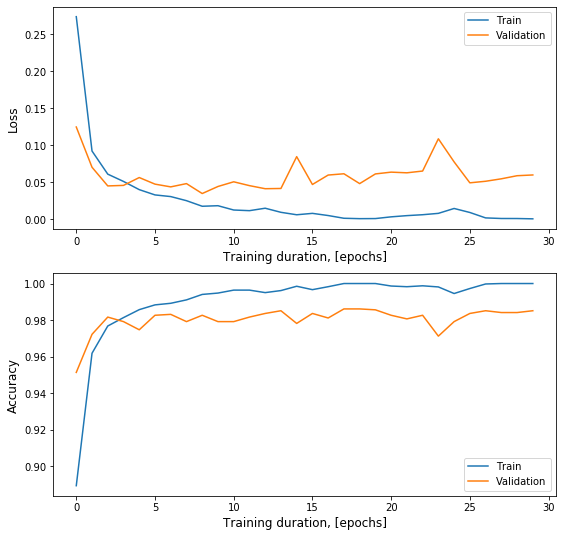

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 12)
plt.xlabel("Training duration, [epochs]",fontsize = 12)
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 12)
plt.xlabel("Training duration, [epochs]",fontsize = 12)

In [72]:
classifier.evaluate(X_test, y_test)

1922/1922 [==============================] - 0s 143us/step


[0.01985228079091471, 0.99583767008707]

### Save model

In [73]:
classifier.save("../Data/five_gestures.h5")
print("Saved model to disk")

Saved model to disk


### Save model for Unity (TensorFlowSharp)

In [74]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [75]:
from keras.models import load_model
from keras import backend as K

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [76]:
model = load_model('../Data/five_gestures.h5')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [77]:
[out.op.name for out in model.outputs]

['dense_33_1/Softmax']

In [78]:
model.outputs

[<tf.Tensor 'dense_33_1/Softmax:0' shape=(?, 5) dtype=float32>]

In [79]:
model.inputs

[<tf.Tensor 'lstm_41_input_1:0' shape=(?, 8, 140) dtype=float32>]

In [80]:
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

INFO:tensorflow:Froze 757 variables.
Converted 757 variables to const ops.


In [81]:
tf.__version__

'1.4.0'

In [82]:
tf.train.write_graph(frozen_graph, "../Models", "five_gestures.pb", as_text=False)

'../Models\\five_gestures.pb'

In [83]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 8, 50)             38200     
_________________________________________________________________
dropout_41 (Dropout)         (None, 8, 50)             0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 8, 50)             20200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 8, 50)             0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 8, 50)             20200     
_________________________________________________________________
dropout_43 (Dropout)         (None, 8, 50)             0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 50)                20200     
__________